<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Belt_Exam_3_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Belt Exam 3 - Modeling
David Burns<Br>
December 4, 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
filename = '/content/option_A_modeling_df - option_A_modeling_df.csv'
df = pd.read_csv(filename)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [ ]:
# copy
df_copy = df.copy()

In [ ]:
# check duplicates
df_copy.duplicated().sum()

0

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [ ]:
# check missing values
df_copy.isna().sum()

SalePrice         0
SqFt1stFloor      0
SqFtHalfFloor     0
SqFt2ndFloor      0
SqFtUpperFloor    0
                 ..
MonthSold_12      0
YearSold_2017     0
YearSold_2018     0
YearSold_2019     0
YearSold_2020     0
Length: 171, dtype: int64

In [ ]:
# checking any inconsistent values
df_copy.describe(include= 'all')

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
count,4.937000e+03,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,...,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,6.644969e+05,1176.440146,51.728378,348.925866,26.740531,1935.915333,595.723314,334.611708,102.511647,170.442576,...,0.082439,0.098440,0.087705,0.095605,0.091351,0.076767,0.246303,0.218756,0.270407,0.018230
std,2.979678e+05,445.949131,174.456092,544.743908,114.985746,764.987161,567.252633,422.990777,187.206721,239.709902,...,0.275060,0.297939,0.282894,0.294078,0.288137,0.266249,0.430901,0.413445,0.444215,0.133795
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.308000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890000e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# The GPS coordinates are unique.  I will visualize the house location on a map
# I got this from https://www.youtube.com/watch?v=fv8NlZfUPG4
# Thanks, Josh!

import plotly.express as px
px.scatter_mapbox(df_copy, lat = 'Latitude', lon = 'Longitude', color = 'SalePrice', mapbox_style = 'open-street-map', width=800, height=800)

There are clearly ritzier neighborhoods with higher priced houses.  I tried adding the clusters as a feature (after the test/train split to avoid data leakage, natch).  I ran the model with and without the cluster feature and with and without the GPS data.  All my fancy feature engineering did was lower the R2 so I got rid of all of it.


Due to all the new data points, heat map and pairplot are going to be useless.  However, I bet a lot of this data doesn't add any value.  I will use VarianceThreshold to filter out some of this useless data.

#Deep Learning Model

In [ ]:
# features
X = df_copy.drop(columns='SalePrice')

# target
y = df_copy['SalePrice']


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# using sklearn variancethreshold to find near constant features
# From the extra info from the class: https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

It turns out that I was wrong.  The model runs plenty fast even with all the features and there is a drop in R2 when removing any feature so I set the threshold to .01.  

In [ ]:
sum(sel.get_support())

170

In [ ]:
sel_active = VarianceThreshold(threshold=.01)
X_train_sel = sel_active.fit(X_train)
sum(sel_active.get_support())

161

In [ ]:
X_train_sel = sel_active.transform(X_train)
X_test_sel = sel_active.transform(X_test)

In [ ]:
# Instantiate scaler
scaler = MinMaxScaler()

# Instantiate PCA
pca = PCA(n_components=.99)

# Setup the pipeline
preprocessor = make_pipeline(scaler,pca)

# Fit the preprocessor on the X_train
preprocessor.fit(X_train_sel)

# Transform the X_train and the X_test

X_train_processed = preprocessor.transform(X_train_sel)
X_test_processed = preprocessor.transform(X_test_sel)

In [ ]:
X_train_processed.shape[1]

141

In [ ]:
X_train_processed

array([[-0.15455919, -0.47571826,  0.48452863, ..., -0.06341102,
         0.01968377, -0.06958517],
       [ 0.29868516, -0.71253441, -0.53608663, ...,  0.0889403 ,
        -0.0431638 ,  0.01323013],
       [-0.58493569, -0.72228109,  0.20470901, ...,  0.01576179,
        -0.00197836,  0.04609363],
       ...,
       [-0.05440261, -0.11992197,  0.21520377, ..., -0.01161974,
         0.0390392 ,  0.22931916],
       [-0.56443942, -0.64289674,  0.35262019, ..., -0.01008057,
         0.00091118, -0.06068425],
       [-0.79417314,  0.16535982,  0.52137074, ...,  0.09221736,
         0.14664022, -0.18528474]])

In [ ]:
# check
X_train_processed.dtype

dtype('float64')

In [ ]:
X_test_processed.dtype

dtype('float64')

In [ ]:
input_dim = X_train_processed.shape[1]
input_dim

141

In [ ]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [ ]:
## define the evaluate_regression function here.

def evaluate_regression(model, X_test, y_test, label="Test Data"):
  y_pred = model.predict(X_test)


   ## Print regression report for the test data
  print('---'*20)
  print(f"REGRESSION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data

  print(f'final RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred)),-1)}')
  print(f'final MAE: {round(mean_absolute_error(y_test, y_pred),-1)}')
  print(f'final R2: {round(r2_score(y_test, y_pred),4)}')

  plt.show()

In [ ]:
# create model

#del model

model = Sequential()
model.add(Dense(60, input_dim = input_dim, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 60)                8520      
                                                                 
 dense_235 (Dense)           (None, 1)                 61        
                                                                 
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', optimizer = 'adam', metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0)

CPU times: user 26.7 s, sys: 1.64 s, total: 28.4 s
Wall time: 41.4 s


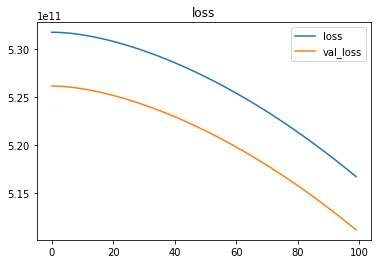

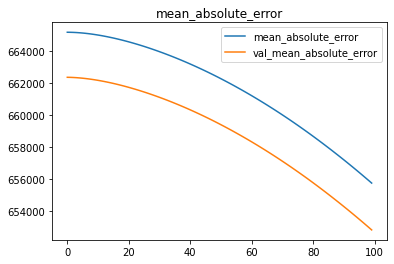

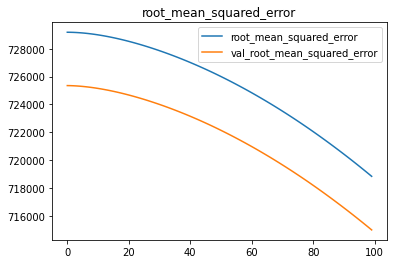

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model, X_test_processed, y_test, label="Test Data");

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 714990.0
final MAE: 652820.0
final R2: -4.8494


Clearly this model is way underfit.  To address the bias I will add a layer to the model.  It will improve the fit.

In [ ]:
# create model

#del model_1A

model_1A = Sequential()
model_1A.add(Dense(60, input_dim = input_dim, activation = 'relu'))
model_1A.add(Dense(40, activation = 'relu'))
model_1A.add(Dense(1, activation = 'linear'))
model_1A.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 60)                8520      
                                                                 
 dense_237 (Dense)           (None, 40)                2440      
                                                                 
 dense_238 (Dense)           (None, 1)                 41        
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1A.compile(loss = 'mse', optimizer = 'adam', metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model_1A.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0)

CPU times: user 28.6 s, sys: 1.84 s, total: 30.5 s
Wall time: 24.7 s


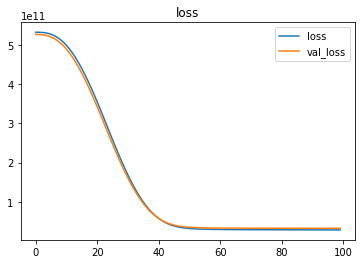

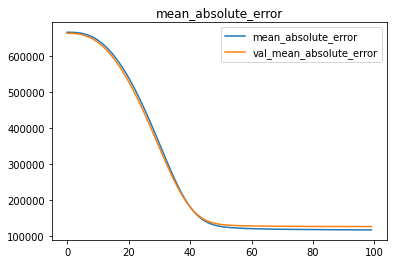

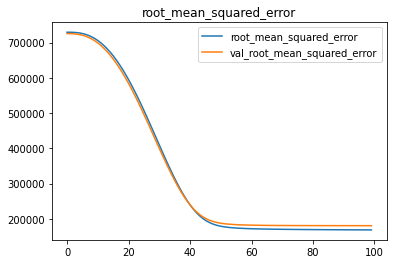

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model_1A, X_test_processed, y_test, label="Test Data");

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 180530.0
final MAE: 125510.0
final R2: 0.6271


Adding a layer really helped!  The model trained faster and converged on an R2 of ~.63!  That's not a great R2 but otherwise the model did well.  I will add two more layers to see if I can get a better R2.

In [ ]:
# create model

#del model_1B

model_1B = Sequential()
model_1B.add(Dense(60, input_dim = input_dim, activation = 'relu'))
model_1B.add(Dense(40, activation = 'relu'))
model_1B.add(Dense(20, activation = 'relu'))
model_1B.add(Dense(1, activation = 'linear'))
model_1B.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_239 (Dense)           (None, 60)                8520      
                                                                 
 dense_240 (Dense)           (None, 40)                2440      
                                                                 
 dense_241 (Dense)           (None, 20)                820       
                                                                 
 dense_242 (Dense)           (None, 1)                 21        
                                                                 
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1B.compile(loss = 'mse', optimizer = 'adam', metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model_1B.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0)

CPU times: user 30.4 s, sys: 2.08 s, total: 32.5 s
Wall time: 26 s


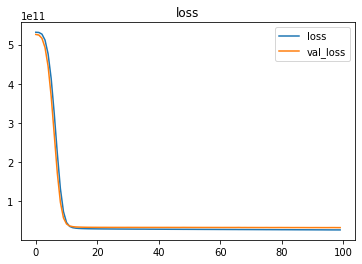

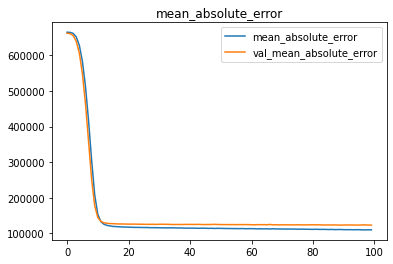

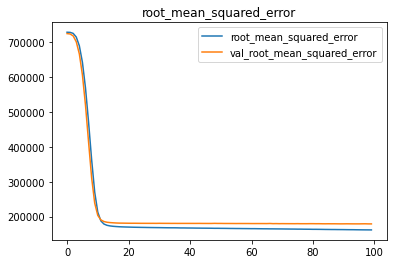

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model_1B, X_test_processed, y_test, label="Test Data");

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 178750.0
final MAE: 123150.0
final R2: 0.6344


This model did a little better than the last model and trained fast! It looks like it overfit a little but it is otherwise pretty good.  I will add another layer and see what happens.

In [ ]:
# create model

#del model_1C

model_1C = Sequential()
model_1C.add(Dense(60, input_dim = input_dim, activation = 'relu'))
model_1C.add(Dense(40, activation = 'relu'))
model_1C.add(Dense(20, activation = 'relu'))
model_1C.add(Dense(10, activation = 'relu'))
model_1C.add(Dense(1, activation = 'linear'))
model_1C.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_243 (Dense)           (None, 60)                8520      
                                                                 
 dense_244 (Dense)           (None, 40)                2440      
                                                                 
 dense_245 (Dense)           (None, 20)                820       
                                                                 
 dense_246 (Dense)           (None, 10)                210       
                                                                 
 dense_247 (Dense)           (None, 1)                 11        
                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1C.compile(loss = 'mse', optimizer = 'adam', metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model_1C.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0)

CPU times: user 31.3 s, sys: 2.04 s, total: 33.4 s
Wall time: 26.6 s


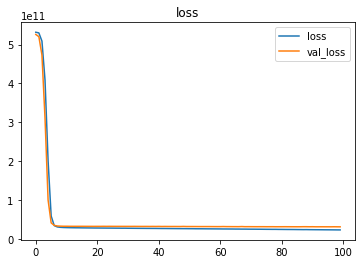

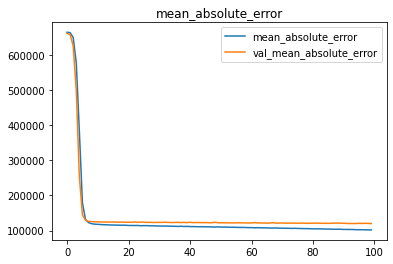

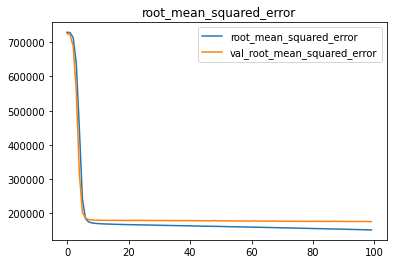

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model_1C, X_test_processed, y_test, label="Test Data");

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 175860.0
final MAE: 119890.0
final R2: 0.6461


This one did a little better measured by R2 but is starting to overfit.  I will use early stopping to see if I can optimize the epoch cycles.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 5)

#del model2

# create model
model2 = Sequential()

model2.add(Dense(60, input_dim = input_dim, activation = 'relu'))
model2.add(Dense(40, activation = 'relu'))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))

model2.compile(loss = 'mse', optimizer = 'adam', metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model2.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0,
                    callbacks=[early_stopping])

CPU times: user 10.3 s, sys: 560 ms, total: 10.8 s
Wall time: 8.84 s


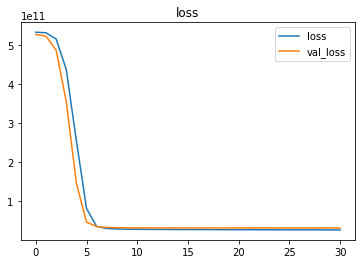

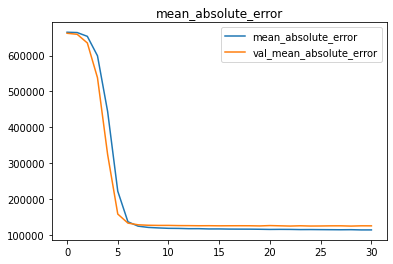

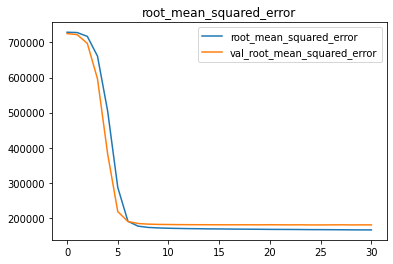

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model2, X_test_processed, y_test, label="Test Data");
# Early Stopping

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 179950.0
final MAE: 124690.0
final R2: 0.6295


This model trained eally fast and with the best R2 so far! I will try dropout to see if I can do any better.

In [ ]:
# create model

#del model3

model3 = Sequential()

model3.add(Dense(60, input_dim = input_dim, activation = 'relu'))
model3.add(Dropout(.1))
model3.add(Dense(40, activation = 'relu'))
model3.add(Dropout(.1))
model3.add(Dense(20, activation = 'relu'))
model3.add(Dropout(.1))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dropout(.1))
model3.add(Dense(1, activation = 'linear'))

model3.compile(loss = 'mse', optimizer = 'adam', metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model3.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0,
                    callbacks=[early_stopping])


CPU times: user 8.38 s, sys: 441 ms, total: 8.82 s
Wall time: 7.12 s


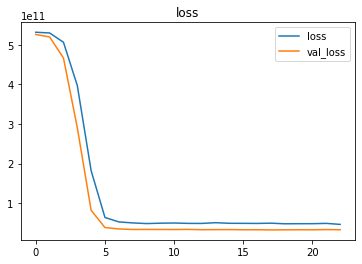

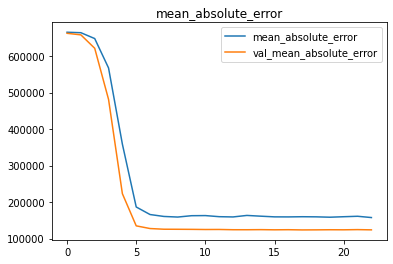

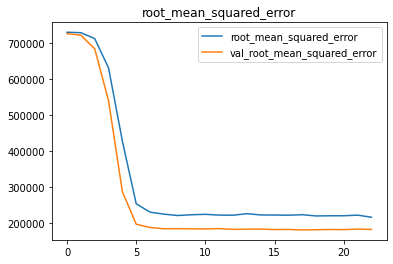

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model3, X_test_processed, y_test, label="Test Data");
# Early Stopping and Dropout


39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 181530.0
final MAE: 123870.0
final R2: 0.6229


This model trained really fast but the R2 dropped a bit.  I will try using L1 and L2 regulation with early stopping to see if I can do any better.

In [ ]:
# create model

from keras import regularizers

#del model4


model4 = Sequential()

model4.add(Dense(60, input_dim = input_dim, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dense(40, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
model4.add(Dense(1, activation = 'linear'))
model4.compile(loss = 'mse',
               optimizer = 'adam',
               metrics=[metrics.MeanAbsoluteError(),metrics.RootMeanSquaredError()])

In [ ]:
# fit your model
%%time
history = model4.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    verbose=0,
                    callbacks=[early_stopping])

CPU times: user 36.9 s, sys: 2.14 s, total: 39 s
Wall time: 30.8 s


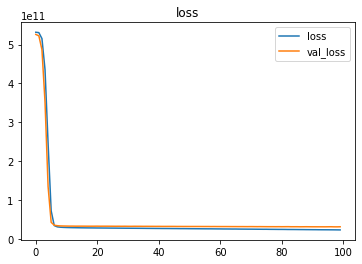

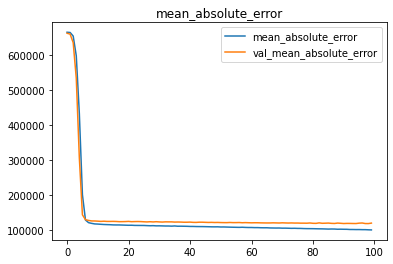

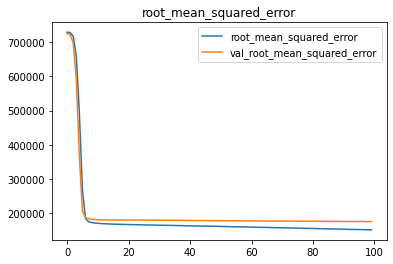

In [ ]:
# plot learning

plot_history(history)

In [ ]:
evaluate_regression(model4, X_test_processed, y_test, label="Test Data");
# Early stopping and L1/L2

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
REGRESSION REPORT FOR: Test Data
------------------------------------------------------------
final RMSE: 175780.0
final MAE: 120250.0
final R2: 0.6464


This is the model!  It trained in under a minute and has the best R2 so far. I would like to get the R2 us and the RMSE and MAE are a bit high.  However, this is the best I got so far.



# Solution to business problem

This model will predict the sale price of a house based on the supplied data.  This will be invaluable in comparing asking prices to predicted sale values.  The error is a little high but for a house flipper it should be good enough to evaluate the price of a house to purchase and predict what improvements will increase the value the most.  